In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_burden = pd.read_csv('data_2020.csv')
data_burden = data_burden[data_burden['burden'].notna()]
data_burden = data_burden[data_burden.columns[data_burden.isnull().mean() < 0.2]]

data_burden.columns[data_burden.isnull().any()]

for column in data_burden.columns:
    data_burden[column].fillna(data_burden[column].mode()[0], inplace=True)

median = data_burden.loc[data_burden['agecr'] < 200, 'agecr'].median()
data_burden["agecr"] = np.where(data_burden["agecr"] > 200, median,data_burden['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

X_feature = data_burden.drop('burden', axis = 1)
y_feature = data_burden['burden']

#m = sqrt(p)+1 features
nfeatures = data_burden.shape[1] - 1
feature_model = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
feature_model.fit(X_feature,y_feature)

#y_hat = feature_model.predict(X)



df_feature = pd.DataFrame(zip(X_feature.columns, feature_model.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])

df_feature[0:29]

,feature,importance
82,burdcat,0.200715
79,HOURS,0.141710
80,hourscat,0.139854
66,adls,0.106888
81,banhours,0.075357
78,Q25,0.062075
60,q22a,0.037226
61,q22b,0.033952
62,q22c,0.028694
63,q22d,0.021017


Text(0, 0.5, 'Features')

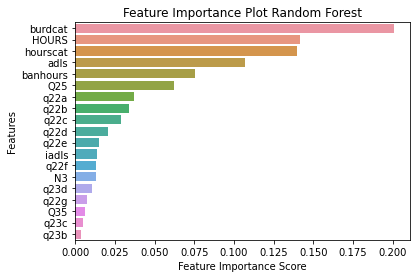

In [5]:
#sorted_importance = sorted(zip(X.columns, model2.feature_importances_), key=lambda t:t[1], reverse = True)
#a, b = zip(*sorted_importance)
#plt.figure(figsize = (10,10))
#df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df_feature[0:19], x = 'importance', y='feature', orient = 'h');
plt.title('Feature Importance Plot Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [6]:
data_burden = data_burden[['year', 'Q18', 'HOURS', 'adls', 'q22a', 'q22b', 'q22d', 'N3', 'q22c', 'iadls', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e', 'burden']]

In [7]:
data_burden.groupby(['Q18'])['Q18'].count().sort_values(ascending=False)

Q18
24.0    486
23.0    256
3.0     255
14.0    226
32.0    213
22.0    165
19.0    138
30.0    134
8.0     130
16.0    126
18.0    126
33.0    118
13.0    101
20.0     99
43.0     98
34.0     93
5.0      85
10.0     79
21.0     73
27.0     54
11.0     46
12.0     37
7.0      33
31.0     30
39.0     23
40.0     21
15.0     20
1.0      13
44.0     12
36.0     10
26.0      8
17.0      8
37.0      8
6.0       8
9.0       4
42.0      4
28.0      3
35.0      3
29.0      2
38.0      2
2.0       1
4.0       1
Name: Q18, dtype: int64

In [8]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0, 43.0]
data_burden = data_burden.loc[data_burden['Q18'].isin(lst)]
data_burden["Q18"] = data_burden["Q18"].astype(str)
data_burden["Q18"] = data_burden["Q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0", '43.0'], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones", "Alzheimer"])
data_burden

,year,Q18,HOURS,adls,q22a,q22b,q22d,N3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,2014,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,2014,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,2014,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,2014,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,2014,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,2019,MobilityProblem,5.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
15523,2019,Surgery,15.0,0.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
15524,2019,Alzheimer,48.0,0.0,2.0,2.0,2.0,1.0,2.0,6.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0
15525,2019,Aging,77.0,2.0,1.0,2.0,1.0,1.0,2.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,5.0


In [9]:
lst2 = ['q22a', 'q22b', 'q22d', 'N3', 'q22c', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e']
data_burden[lst2] = data_burden[lst2].astype(object)

In [10]:
data_burden = data_burden[data_burden['q22a'] != 3.0]
data_burden = data_burden[data_burden['q22a'] != 4.0]
data_burden = data_burden[data_burden['q22b'] != 3.0]
data_burden = data_burden[data_burden['q22b'] != 4.0]
data_burden = data_burden[data_burden['q22d'] != 3.0]
data_burden = data_burden[data_burden['q22d'] != 4.0]
data_burden = data_burden[data_burden['N3'] != 3.0]
data_burden = data_burden[data_burden['N3'] != 4.0]
data_burden = data_burden[data_burden['q22c'] != 3.0]
data_burden = data_burden[data_burden['q22c'] != 4.0]
data_burden = data_burden[data_burden['q22g'] != 3.0]
data_burden = data_burden[data_burden['q22g'] != 4.0]
data_burden = data_burden[data_burden['q22f'] != 3.0]
data_burden = data_burden[data_burden['q22f'] != 4.0]
data_burden = data_burden[data_burden['q23d'] != 3.0]
data_burden = data_burden[data_burden['q23d'] != 4.0]
data_burden = data_burden[data_burden['q23c'] != 3.0]
data_burden = data_burden[data_burden['q23c'] != 4.0]
data_burden = data_burden[data_burden['q22e'] != 3.0]
data_burden = data_burden[data_burden['q22e'] != 4.0]
data_burden = data_burden[data_burden['banlives'] != 3.0]

In [11]:
data_burden.head()

,year,Q18,HOURS,adls,q22a,q22b,q22d,N3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,2014,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,2014,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,2014,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,2014,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,2014,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0


In [12]:
data_burden["q22a"] = data_burden["q22a"].astype(str)
data_burden["q22a"] = data_burden["q22a"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22b"] = data_burden["q22b"].astype(str)
data_burden["q22b"] = data_burden["q22b"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22d"] = data_burden["q22d"].astype(str)
data_burden["q22d"] = data_burden["q22d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["N3"] = data_burden["N3"].astype(str)
data_burden["N3"] = data_burden["N3"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22c"] = data_burden["q22c"].astype(str)
data_burden["q22c"] = data_burden["q22c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22g"] = data_burden["q22g"].astype(str)
data_burden["q22g"] = data_burden["q22g"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22f"] = data_burden["q22f"].astype(str)
data_burden["q22f"] = data_burden["q22f"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23d"] = data_burden["q23d"].astype(str)
data_burden["q23d"] = data_burden["q23d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23c"] = data_burden["q23c"].astype(str)
data_burden["q23c"] = data_burden["q23c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22e"] = data_burden["q22e"].astype(str)
data_burden["q22e"] = data_burden["q22e"].replace(["1.0","2.0"], ["Yes","No"])

data_burden["banlives"] = data_burden["banlives"].astype(str)
data_burden["banlives"] = data_burden["banlives"].replace(["1.0","2.0"], ["Yes","No"])

In [13]:
data_burden.columns = ['year', 'illness', 'hours', 'adls', 'help_with_bed', 'help_with_dressed', 'help_with_bathe', 'help_with_med', 'help_with_toilet', 'iadls', 'giving_medicine', 'help_with_feeding', 'preparing_meals', 'live_with_cr', 'help_housework', 'help_with_diapers', 'burden']
data_burden = data_burden.reset_index(drop=True)

In [14]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data_burden, title="Report")
#profile

## Plots Using 2014 Data

In [15]:
"""
df_1 = data_burden.groupby(['illness'])['burden'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['burden'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['burden'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "burden", fontsize=40)
plt.plot()
plt.show()
"""

'\ndf_1 = data_burden.groupby([\'illness\'])[\'burden\'].median()\ndf_1 = df_1.to_frame()\ndf_1.reset_index(inplace=True)\ndf_1 = df_1.rename(columns = {\'index\':\'illness\'})\ndf_1[\'illness\'] = df_1[\'illness\'].astype(object)\n\nfig = plt.figure(1, [20, 8])\nfig.clf()\n\nax = fig.add_subplot(111)\nax.set_xlim(-1,14)\nplt.setp(ax.get_xticklabels(), fontsize=10, rotation=\'vertical\')\nplt.bar(df_1[\'illness\'],df_1[\'burden\'])\n\nplt.axhline(y=(df_1[df_1[\'illness\'] == \'Aging\'][\'burden\'][0]),linewidth= 3, color=\'r\', linestyle= \'dotted\')\nplt.title(label = "burden", fontsize=40)\nplt.plot()\nplt.show()\n'

In [16]:
data_2014 = data_burden[data_burden['year'] == 2014]
data_2015 = data_burden[data_burden['year'] == 2015]
data_2014.head()

,year,illness,hours,adls,help_with_bed,help_with_dressed,help_with_bathe,help_with_med,help_with_toilet,iadls,giving_medicine,help_with_feeding,preparing_meals,live_with_cr,help_housework,help_with_diapers,burden
0,2014,Aging,28.0,0.0,No,No,No,No,No,4.0,No,No,Yes,Yes,Yes,No,3.0
1,2014,MobilityProblem,0.5,4.0,Yes,Yes,No,Yes,No,6.0,Yes,Yes,Yes,No,Yes,Yes,3.0
2,2014,Arthritis,77.0,0.0,No,No,No,Yes,No,5.0,Yes,No,No,No,Yes,No,4.0
3,2014,Cancer,12.0,0.0,No,No,No,No,No,6.0,No,No,Yes,No,Yes,No,2.0
4,2014,Diabetes,21.0,2.0,Yes,No,No,Yes,Yes,7.0,Yes,No,Yes,No,Yes,No,4.0


In [17]:
"""
sns.catplot(x="burden", y="help_with_diapers", kind="box", data=data_2014)
sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_2014)
"""

'\nsns.catplot(x="burden", y="help_with_diapers", kind="box", data=data_2014)\nsns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_2014)\n'

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


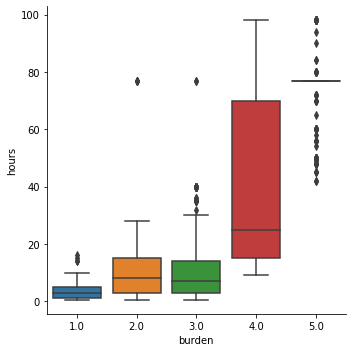

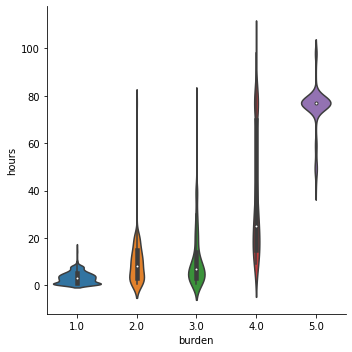

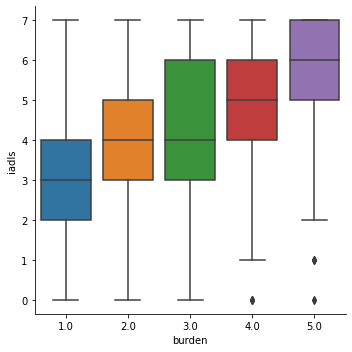

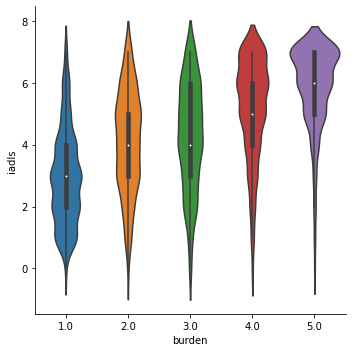

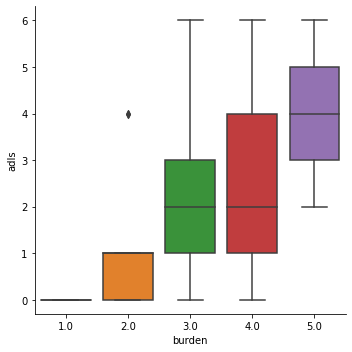

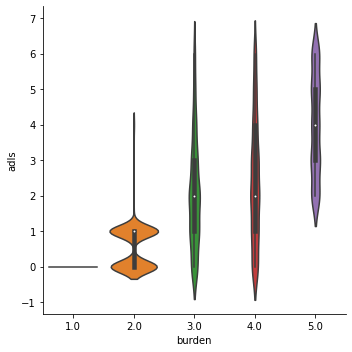

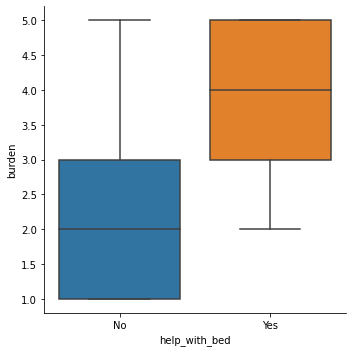

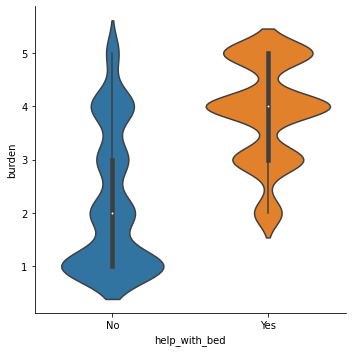

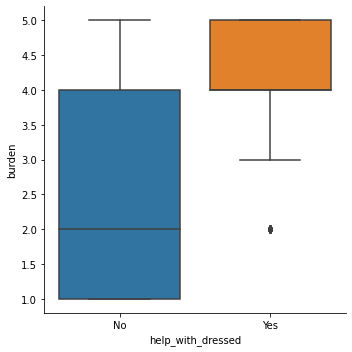

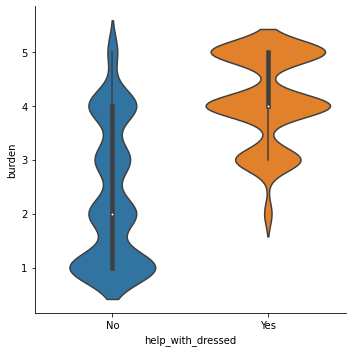

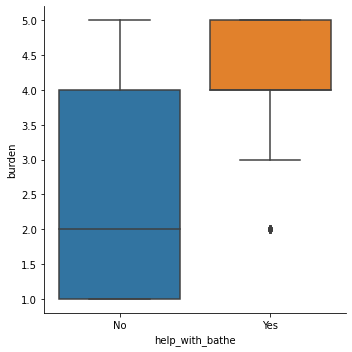

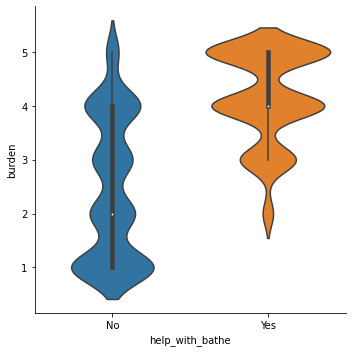

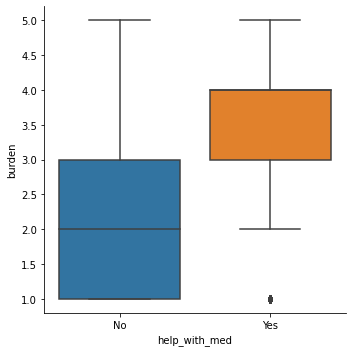

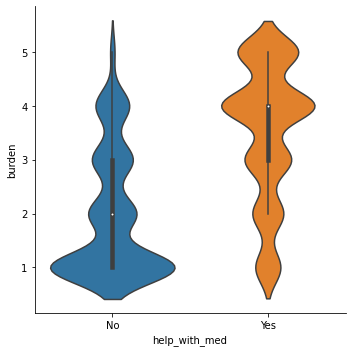

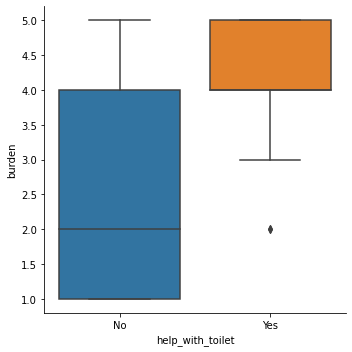

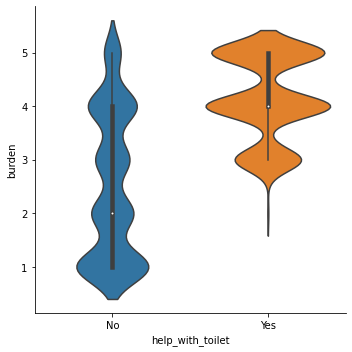

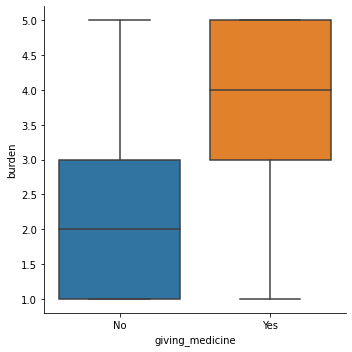

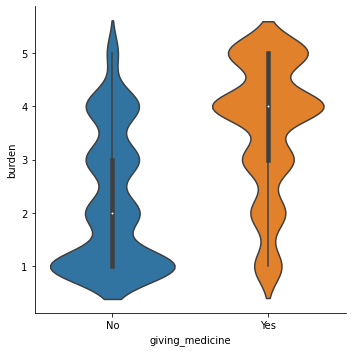

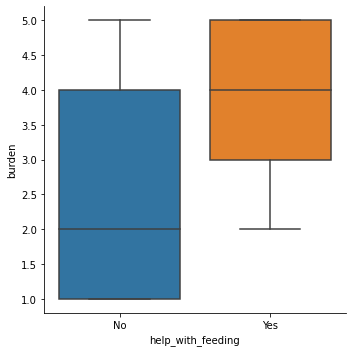

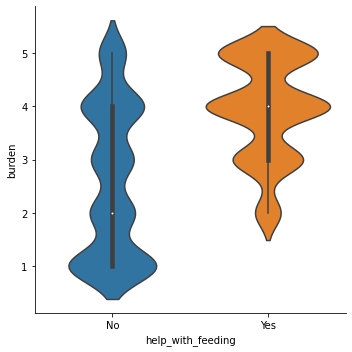

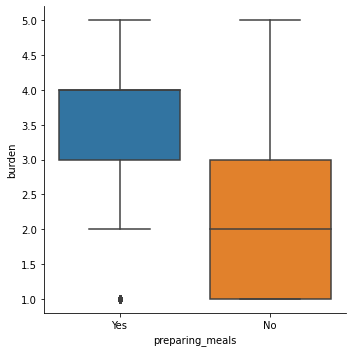

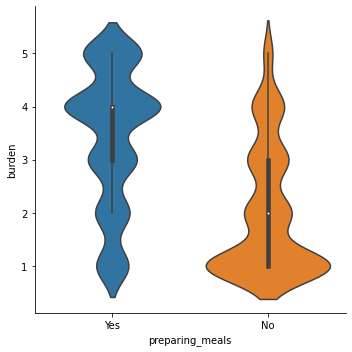

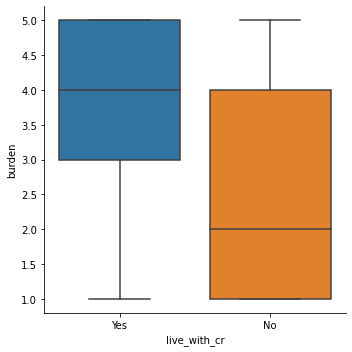

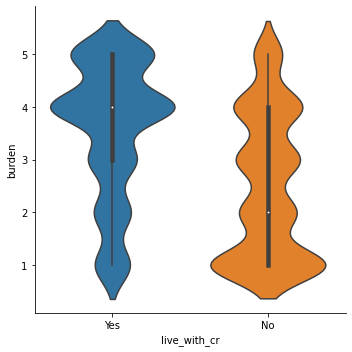

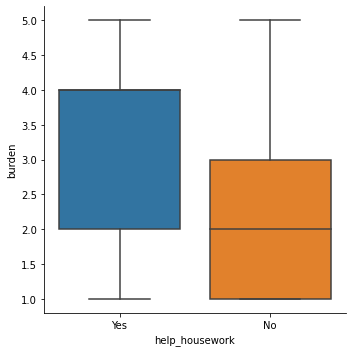

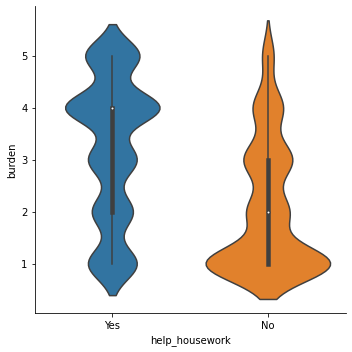

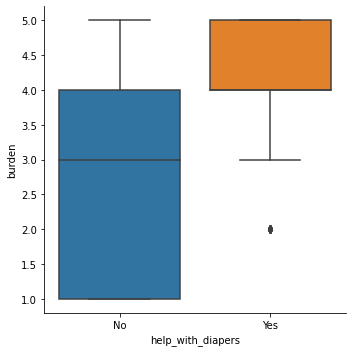

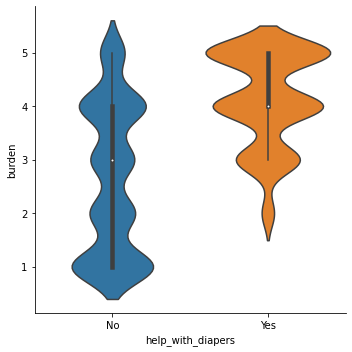

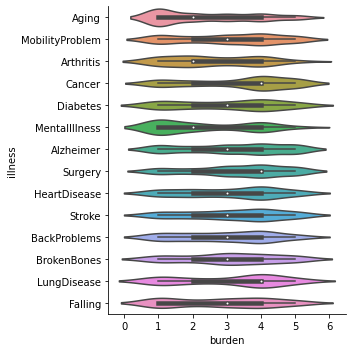

In [18]:
sns.catplot(x="burden", y="hours", kind="box", data=data_burden)
sns.catplot(x="burden", y="hours", kind="violin", data=data_burden)

sns.catplot(x="burden", y="iadls", kind="box", data=data_burden)
sns.catplot(x="burden", y="iadls", kind="violin", data=data_burden)

sns.catplot(x="burden", y="adls", kind="box", data=data_burden)
sns.catplot(x="burden", y="adls", kind="violin", data=data_burden)

sns.catplot(x="help_with_bed", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_bed", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_dressed", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_dressed", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_bathe", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_bathe", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_med", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_med", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_toilet", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_toilet", y="burden", kind="violin", data=data_burden)

sns.catplot(x="giving_medicine", y="burden", kind="box", data=data_burden)
sns.catplot(x="giving_medicine", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_feeding", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_feeding", y="burden", kind="violin", data=data_burden)

sns.catplot(x="preparing_meals", y="burden", kind="box", data=data_burden)
sns.catplot(x="preparing_meals", y="burden", kind="violin", data=data_burden)

sns.catplot(x="live_with_cr", y="burden", kind="box", data=data_burden)
sns.catplot(x="live_with_cr", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_housework", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_housework", y="burden", kind="violin", data=data_burden)

sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_burden)
sns.catplot(x="help_with_diapers", y="burden", kind="violin", data=data_burden)



sns.catplot(x="burden", y="illness",
            kind="violin", data=data_burden)


## Regression

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_cont = data_burden.select_dtypes(include=numerics)
df_cat = data_burden.select_dtypes(include = 'object')

### Dummy Code Categoricals

In [20]:
df_cat_dc = pd.get_dummies(df_cat)
df_cat_dc

,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,illness_BrokenBones,illness_Cancer,illness_Diabetes,illness_Falling,illness_HeartDisease,illness_LungDisease,...,help_with_feeding_No,help_with_feeding_Yes,preparing_meals_No,preparing_meals_Yes,live_with_cr_No,live_with_cr_Yes,help_housework_No,help_housework_Yes,help_with_diapers_No,help_with_diapers_Yes
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2524,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
2525,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2526,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0


In [21]:
df_reg = pd.concat([df_cont, df_cat_dc], axis = 1)
df_reg

,year,hours,adls,iadls,burden,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,illness_BrokenBones,...,help_with_feeding_No,help_with_feeding_Yes,preparing_meals_No,preparing_meals_Yes,live_with_cr_No,live_with_cr_Yes,help_housework_No,help_housework_Yes,help_with_diapers_No,help_with_diapers_Yes
0,2014,28.0,0.0,4.0,3.0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1,2014,0.5,4.0,6.0,3.0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,2014,77.0,0.0,5.0,4.0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
3,2014,12.0,0.0,6.0,2.0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
4,2014,21.0,2.0,7.0,4.0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2019,5.0,0.0,2.0,1.0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2524,2019,15.0,0.0,5.0,2.0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0
2525,2019,48.0,0.0,6.0,4.0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2526,2019,77.0,2.0,7.0,5.0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0


### Helper Function 10-CV

In [22]:
# 10-Fold Cross Validation
def cross_validation (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
    kf_rmse = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'burden']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'burden']
        y_train = df.iloc[train].loc[:,'burden']
        y_test = df.iloc[test].loc[:,'burden']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import mean_squared_error
        kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))
        
    kf_RMSE = (1/10) * np.sum(kf_rmse)
        
    return (kf_RMSE)

In [23]:
X_train = df_reg[df_reg['year'] == 2014]
y_train = X_train['burden']
X_train = X_train.drop('burden', axis = 1)
df_train = pd.concat([X_train, y_train], axis=1, join='outer')

X_test = df_reg[df_reg['year'] == 2019]
y_test = X_test['burden']
X_test = X_test.drop('burden', axis = 1)

### Linear Regression

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [25]:
#Check which one produces higher R2 score and lower cv-rmse
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train, y_train)

y_hat1 = model1.predict(X_test)

score1 = np.mean(cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 10))
model1_train_rmse = mean_squared_error(y_test, y_hat1, squared=False)
model1_cv_rmse = cross_validation(df_reg, model1)

print('test RMSE = ', model1_train_rmse)
print('10 CV RMSE = ', model1_cv_rmse)
print('score1 = ', score1)

test RMSE =  0.6319448630630945
10 CV RMSE =  0.5817282754002132
score1 =  -1.3477865128119577e+19


In [26]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Text(0, 0.5, 'Predicted Value')

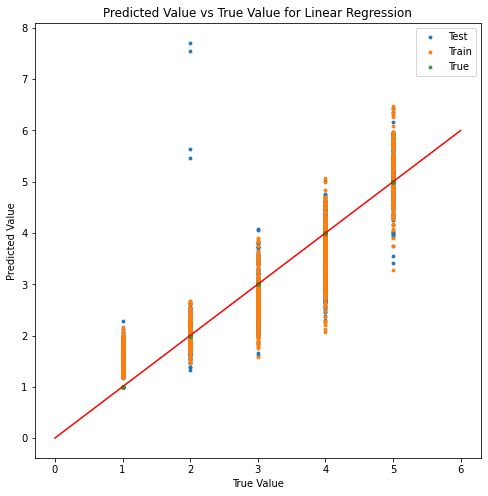

In [27]:
plt.figure(figsize = (8,8))
plt.scatter(x = y_test, y = y_hat1, s = 8, label = "Test")
plt.scatter(x = y_train, y = model1.predict(X_train), s = 8, label = "Train")
plt.scatter(x = df_reg['burden'], y = df_reg['burden'], s = 8, label = "True")
plt.plot([0,6], [0,6], color = "r")
plt.legend(loc=0)
plt.title("Predicted Value vs True Value for Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

### Random Forest

In [28]:
randomForest = RandomForestRegressor(random_state = 0)

In [29]:
grid_para_forest = {'n_estimators': [100,500,1000,2500,5000],
'max_depth': [10,15,20,30,40,50],
'max_features' : [5,7,15]}

In [30]:
from sklearn.model_selection import GridSearchCV

grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=10, n_jobs = 5, verbose=1)
grid_search_forest.fit(X_train, y_train)


Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=5,
             param_grid={'max_depth': [10, 15, 20, 30, 40, 50],
                         'max_features': [5, 7, 15],
                         'n_estimators': [100, 500, 1000, 2500, 5000]},
             verbose=1)

In [31]:
model2 = grid_search_forest.best_estimator_
yhat_2 = model2.predict(X_test)

In [32]:
model2_train_rmse = mean_squared_error(y_test, yhat_2, squared=False)
model2_cv_rmse = cross_validation(df_reg, model2)
score2 = np.mean(cross_val_score(estimator = model2, X = X_train, y = y_train, cv = 10))

print('test RMSE = ', model2_train_rmse)
print('10 CV RMSE = ', model2_cv_rmse)
print('score = ', score2)

test RMSE =  0.17493275672722006
10 CV RMSE =  0.11144265035936113
score =  0.9947268060035575


Text(0, 0.5, 'Predicted Value')

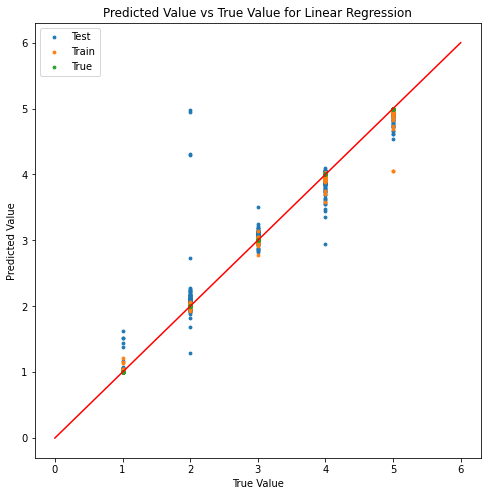

In [33]:
plt.figure(figsize = (8,8))
plt.scatter(x = y_test, y = yhat_2, s = 8, label = "Test")
plt.scatter(x = y_train, y = model2.predict(X_train), s = 8, label = "Train")
plt.scatter(x = df_reg['burden'], y = df_reg['burden'], s = 8, label = "True")
plt.plot([0,6], [0,6], color = "r")
plt.legend(loc=0)
plt.title("Predicted Value vs True Value for Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

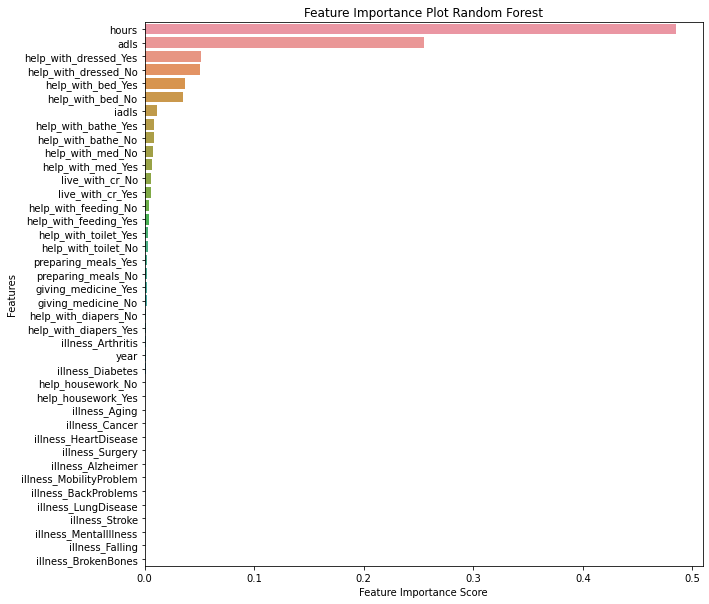

In [34]:
sorted_importance = sorted(zip(df_reg.drop('burden', axis = 1).columns, model2.feature_importances_), key=lambda t:t[1], reverse = True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y='feature_name', orient = 'h');
plt.title('Feature Importance Plot Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [35]:
imp_cols = df[df['importance_score'] > 0.004]['feature_name'].tolist()

In [36]:
grid_search_forest.fit(X_train[imp_cols], y_train)

model22 = grid_search_forest.best_estimator_
yhat_22 = model22.predict(X_test[imp_cols])

Fitting 10 folds for each of 90 candidates, totalling 900 fits


c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\Woon.Kim\Anaconda33\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Woon.Kim\Anaconda

In [37]:
model22_train_rmse = mean_squared_error(y_test, yhat_22, squared=False)
model22_cv_rmse = cross_validation(df_reg, model22)
score22 = np.mean(cross_val_score(estimator = model22, X = X_train, y = y_train, cv = 10))

print('test RMSE = ', model22_train_rmse)
print('10 CV RMSE = ', model22_cv_rmse)
print('score = ', score22)

test RMSE =  0.16094146507510382
10 CV RMSE =  0.24074699148491116
score =  0.9686600065199935


Text(0, 0.5, 'Predicted Value')

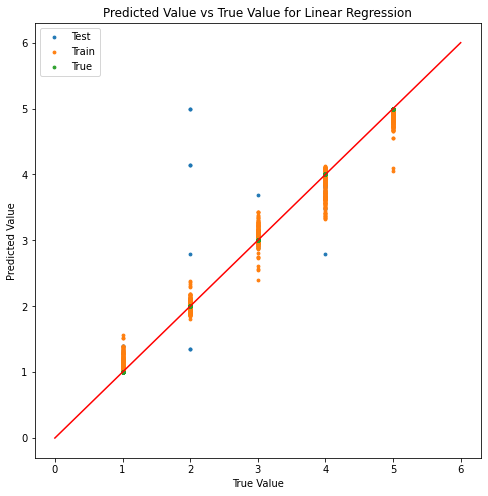

In [38]:
plt.figure(figsize = (8,8))
plt.scatter(x = y_test, y = yhat_22, s = 8, label = "Test")
plt.scatter(x = y_train, y = model22.predict(X_train), s = 8, label = "Train")
plt.scatter(x = df_reg['burden'], y = df_reg['burden'], s = 8, label = "True")
plt.plot([0,6], [0,6], color = "r")
plt.legend(loc=0)
plt.title("Predicted Value vs True Value for Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

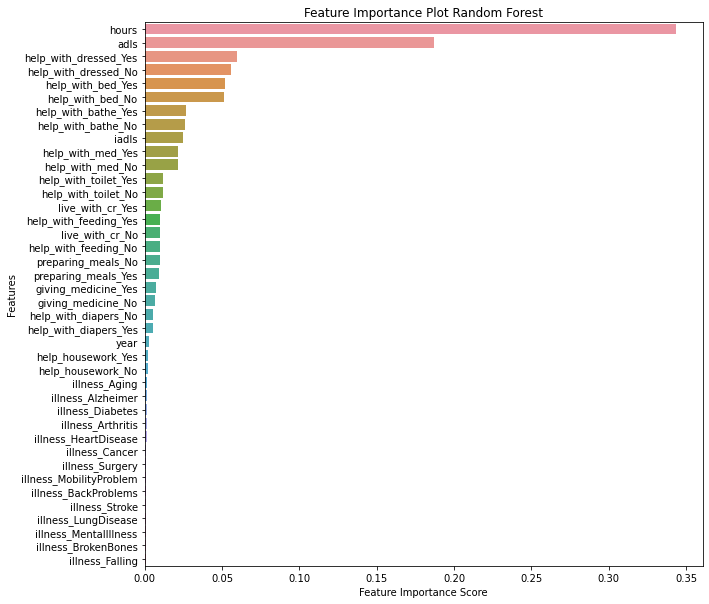

In [39]:
sorted_importance = sorted(zip(df_reg.drop('burden', axis = 1).columns, model22.feature_importances_), key=lambda t:t[1], reverse = True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y='feature_name', orient = 'h');
plt.title('Feature Importance Plot Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state = 0)

In [ ]:
grid_para_gb = {'n_estimators': [100,500,1000,2500,5000],
                   'learning_rate':[0.01,0.05,0.1],
                   'max_depth':range(1,6),
                   'max_features' : [5,7,15]}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search_gb = GridSearchCV(gbm, grid_para_gb, cv=5, n_jobs = 5, verbose = 1)
grid_search_gb.fit(X, y)


In [ ]:
model3 = grid_search_gb.best_estimator_
yhat_3 = model3.predict(X)

In [ ]:
model3_train_rmse = mean_squared_error(y, yhat_3, squared=False)
model3_cv_rmse = cross_validation(df_reg, model3)
score3 = model3.score(X, y)

print('train RMSE = ', model3_train_rmse)
print('10 CV RMSE = ', model3_cv_rmse)
print('score3 = ', score3)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.scatter(x = y, y = yhat_3, s = 8, label = "Test")
#plt.scatter(x = y_train, y = bestmodel_rf.predict(X_train), s = 8, label = "Train")
plt.plot([-2,8],[-2,8], color = "r")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Gradient Boost")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [ ]:
sorted_importance = sorted(zip(X.columns, model3.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance Plot Gradient Boosting')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [ ]:
imp_cols = df[df['importance_score'] > 0.004]['feature_name'].tolist()

In [ ]:
grid_search_gb.fit(X[imp_cols], y)

model33 = grid_search_gb.best_estimator_
yhat_33 = model33.predict(X[imp_cols])

In [ ]:
model33_train_rmse = mean_squared_error(y, yhat_33, squared=False)
model33_cv_rmse = cross_validation(df_reg, model33)
score33 = model33.score(X, y)

print('train RMSE = ', model33_train_rmse)
print('10 CV RMSE = ', model33_cv_rmse)
print('score33 = ', score33)

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(x = y, y= yhat_33, s = 8, label = "Test")
#plt.scatter(x = y_train, y=bestmodel_rf.predict(X_train), s=8, label = "Train")
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.plot([0,6],[0,6], color = 'r')
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Gradient Boost2")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [ ]:
sorted_importance = sorted(zip(X.columns, model33.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance Plot Gradient Boosting2')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

### RMSE Summary

In [ ]:
x = ['LinReg', 'RandomForest1', 'RandomForest2', 'GB1', 'GB2']
y1 = [model1_train_rmse, model2_train_rmse, model22_train_rmse, model3_train_rmse, model33_train_rmse]
y2 = [model1_cv_rmse, model2_cv_rmse, model22_cv_rmse, model3_cv_rmse, model33_cv_rmse]

plt.plot(x, y2, label = "10-CV RMSE", c='r')
plt.plot(x, y1, label = "Train RMSE", c='b')
plt.legend()
plt.grid()
plt.show()

## Classification